## Read updated GO Terms (2024)

### Filtered only Biological Process GO Terms from Updated GO Terms

In [1]:
import pandas as pd

# Load updated GO annotations
upd_go_df = pd.read_csv(
    'https://raw.githubusercontent.com/NegarJanani/gene-ontology/refs/heads/gh-pages/annotations/taxid_9606/GO_annotations-9606-inferred-allev.tsv',
    sep='\t'
)

# Expand gene_ids and gene_symbols into individual rows
exp_df = upd_go_df.assign(
    gene_id=upd_go_df['gene_ids'].str.split('|'),
    gene_symbol=upd_go_df['gene_symbols'].str.split('|')
)
upd_gg_df = exp_df.explode(['gene_id', 'gene_symbol'])

# Clean data
upd_gg_df['gene_id'] = upd_gg_df['gene_id'].str.strip()
upd_gg_df['gene_symbol'] = upd_gg_df['gene_symbol'].str.strip()
upd_gg_df = upd_gg_df[upd_gg_df['gene_id'] != '...']
upd_gg_df['gene_id'] = upd_gg_df['gene_id'].astype(int)

print('Updated (2024) All GO Terms:')
# Keep selected columns
upd_gg_df = upd_gg_df[['go_id', 'go_name', 'go_domain', 'gene_id', 'gene_symbol']]
display(upd_gg_df.head(2))
print(f"#  Updated (2024) pairs of Gene Onctology Terms and Gene: {upd_gg_df.shape[0]}\n\n")
print('Updated (2024) GO Terms only for Biological Process:')
upd_bp_df=upd_gg_df[upd_gg_df['go_domain']=='biological_process']
display(upd_bp_df.head(2))
#upd_bp_df['gene_id'] = upd_bp_df['gene_id'].astype(int)
print(f"# Updated (2024) pairs of Gene Onctology Terms only for Biological Process and Gene :{upd_bp_df.shape[0]}\n\n")

Updated (2024) All GO Terms:


,go_id,go_name,go_domain,gene_id,gene_symbol
0,GO:0000002,mitochondrial genome maintenance,biological_process,142,PARP1
0,GO:0000002,mitochondrial genome maintenance,biological_process,291,SLC25A4


#  Updated (2024) pairs of Gene Onctology Terms and Gene: 1756264


Updated (2024) GO Terms only for Biological Process:


,go_id,go_name,go_domain,gene_id,gene_symbol
0,GO:0000002,mitochondrial genome maintenance,biological_process,142,PARP1
0,GO:0000002,mitochondrial genome maintenance,biological_process,291,SLC25A4


# Updated (2024) pairs of Gene Onctology Terms only for Biological Process and Gene :1089604




In [2]:
n_go_2024=len(upd_bp_df['go_id'].unique())
print(f"# of Unique GO Terms for Biolocal Process in Updated GO is {n_go_2024}")

# of Unique GO Terms for Biolocal Process in Updated GO is 15101


In [3]:
n_gene_2024=len(upd_bp_df['gene_id'].unique())
print(f"# of Unique genes in GO Terms for Biolocal Process in Updated GO is {n_gene_2024}")

# of Unique genes in GO Terms for Biolocal Process in Updated GO is 18810


## Read Pre-calculated Hetionet Statistics for Metapaths and Paths

### Hetionet metapaths statistics for the pairs of Biological Process (BP) and Gene (G)
### Filtered out the metapaths with length 3

In [4]:
import pandas as pd

# Read pickle file
hetio_mp3_df = pd.read_pickle('./input/pre_cal_hetionet_metapaths_BP_G_MPL3.pkl')

# Preview the data
display(hetio_mp3_df.head(2))




,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131035,GO:0000012,10396,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,14539,12232813
1,3131036,GO:0000012,80223,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,32981,12232813


In [5]:
print(f"#of precalculated metapaths statistics for the pairs of Biological Process (BP) and Gene (G) Metapaths with length 3: {hetio_mp3_df.shape[0]}")

#of precalculated metapaths statistics for the pairs of Biological Process (BP) and Gene (G) Metapaths with length 3: 46396080


### Filtered out GO with Metapaths length 3 and Path counts 1

In [6]:
hetio_mp3_pc1_df=hetio_mp3_df[hetio_mp3_df['path_count']==1]
hetio_mp3_pc1_df=hetio_mp3_pc1_df.reset_index(drop=True)
display(hetio_mp3_pc1_df.head(2))

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131035,GO:0000012,10396,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,14539,12232813
1,3131036,GO:0000012,80223,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,32981,12232813


In [7]:
print(f"#of precalculated metapaths statistics for the pairs of Biological Process (BP) and Gene (G) Metapaths with length 3 with path counts: {hetio_mp3_pc1_df.shape[0]}")

#of precalculated metapaths statistics for the pairs of Biological Process (BP) and Gene (G) Metapaths with length 3 with path counts: 415952


### BP GO Terms common in Hetionet with Meta Path Length (MPL): 3 and Path Count (PC): 1 and Updated GO (2024)

In [8]:
go_bp_common=((set(hetio_mp3_pc1_df['source_identifier']) & set(upd_bp_df['go_id'])))

len(go_bp_common)

10075

In [9]:
common_upd_bp_df=upd_bp_df[upd_bp_df['go_id'].isin(go_bp_common)]
display(common_upd_bp_df.head(2))
print(common_upd_bp_df.shape)

,go_id,go_name,go_domain,gene_id,gene_symbol
0,GO:0000002,mitochondrial genome maintenance,biological_process,142,PARP1
0,GO:0000002,mitochondrial genome maintenance,biological_process,291,SLC25A4


(534186, 5)


In [10]:
# Count number of genes per GO term in the updated GO set (2024)
upd_go_cnt = common_upd_bp_df['go_id'].value_counts().reset_index()
upd_go_cnt.columns = ['go_id', 'n_genes_upd_go_2024']

display(upd_go_cnt)


,go_id,n_genes_upd_go_2024
0,GO:0044419,1632
1,GO:0071705,1534
2,GO:0009607,1510
3,GO:0043207,1466
4,GO:0051707,1463
...,...,...
10070,GO:0035247,1
10071,GO:0035261,1
10072,GO:2000043,1
10073,GO:0070368,1


In [11]:
# Filter Hetionet metapaths for common GO terms
common_hetio_mp3_pc1 = hetio_mp3_pc1_df[hetio_mp3_pc1_df['source_identifier'].isin(go_bp_common)]

display(common_hetio_mp3_pc1.head(2))
print(common_hetio_mp3_pc1.shape)


,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131035,GO:0000012,10396,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,14539,12232813
1,3131036,GO:0000012,80223,BPpGbCuG,1,0.008803,0.000187,7.448745,7,1,87936800,1004171,4.84376,1.088758,21400,32981,12232813


(364891, 17)


In [12]:
# Count number of genes per GO term in filtered Hetionet metapaths
hetio_cnt = common_hetio_mp3_pc1['source_identifier'].value_counts().reset_index()
hetio_cnt.columns = ['go_id', 'n_genes_hetio_mp3_pc1']

display(hetio_cnt)


,go_id,n_genes_hetio_mp3_pc1
0,GO:0017186,2845
1,GO:0051725,1941
2,GO:0018199,1128
3,GO:0031989,1114
4,GO:0019236,983
...,...,...
10070,GO:0010965,1
10071,GO:0051444,1
10072,GO:0051443,1
10073,GO:0051340,1


In [13]:
# Merge Hetionet and updated GO gene counts by GO ID
merged_counts = pd.merge(hetio_cnt, upd_go_cnt, on='go_id', how='inner')

display(merged_counts.head(2))


,go_id,n_genes_hetio_mp3_pc1,n_genes_upd_go_2024
0,GO:0017186,2845,2
1,GO:0051725,1941,6


In [14]:
# Calculate percent change in gene count from Hetionet to updated GO
merged_counts['pct_change_genes'] = (
    (merged_counts['n_genes_upd_go_2024'] - merged_counts['n_genes_hetio_mp3_pc1']) /
    merged_counts['n_genes_hetio_mp3_pc1']
) * 100

display(merged_counts.head(4))


,go_id,n_genes_hetio_mp3_pc1,n_genes_upd_go_2024,pct_change_genes
0,GO:0017186,2845,2,-99.929701
1,GO:0051725,1941,6,-99.690881
2,GO:0018199,1128,4,-99.645390
3,GO:0031989,1114,2,-99.820467


### Considered GO Terms which have up to 250 Genes and increased genes by up to 25%

In [15]:
# Filter GO terms with 2–250 genes in Hetionet, and 0–25% gene increase in updated GO
merged_filt = merged_counts[
    (merged_counts['n_genes_hetio_mp3_pc1'] >= 2) &
    (merged_counts['n_genes_hetio_mp3_pc1'] <= 250) &
    (merged_counts['pct_change_genes'] > 0) &
    (merged_counts['pct_change_genes'] <= 25)
].reset_index(drop=True)

display(merged_filt.head(2))


,go_id,n_genes_hetio_mp3_pc1,n_genes_upd_go_2024,pct_change_genes
0,GO:1901890,95,112,17.894737
1,GO:0042147,92,96,4.347826


In [16]:
merged_filt.shape

(341, 4)

In [20]:
# Filter Hetionet rows for GO terms meeting 2–250 gene count and ≤25% gene addition
hetio_filt = common_hetio_mp3_pc1[
    common_hetio_mp3_pc1['source_identifier'].isin(merged_filt['go_id'])
].reset_index(drop=True)


In [21]:
hetio_filt

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131217,GO:0001956,4602,BPpGbCuG,1,0.007132,0.000152,7.758083,12,3,14012800,774470,4.130925,1.079296,34112,27295,12233145
1,3131319,GO:0002407,3385,BPpGbCuG,1,0.006224,0.000132,8.097550,16,8,1728000,284289,3.726058,1.083581,5759,44359,12233414
2,3131462,GO:0006084,23142,BPpGbCuG,1,0.009107,0.000194,7.838121,25,5,2520000,419780,3.658546,1.080579,22264,18935,12234005
3,3132087,GO:0006636,3251,BPpGbCuG,1,0.008053,0.000171,7.749187,56,1,5969600,500293,3.920684,1.081670,2033,9340,12236047
4,3132088,GO:0006636,80349,BPpGbCuG,1,0.008053,0.000171,7.749187,56,1,5969600,500293,3.920684,1.081670,2033,17562,12236047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,163776452,GO:0070168,26511,BPpGbCdG,1,0.004258,0.000091,8.280819,19,8,1339000,248684,3.699015,1.072744,1408,17026,12117264
8552,163777548,GO:1900048,3875,BPpGbCdG,1,0.012430,0.000264,7.801564,24,8,1222000,281569,3.624240,1.076801,37006,38561,12117674
8553,163777549,GO:1900048,6923,BPpGbCdG,1,0.008194,0.000174,7.945405,24,6,2124400,391029,3.684517,1.076196,37006,22199,12117672
8554,163778393,GO:2001057,967,BPpGbCdG,1,0.010536,0.000224,7.550245,36,1,9052800,492077,4.141381,1.079540,16619,14084,12118651


In [22]:
# Filter updated GO rows for GO terms meeting 2–250 gene count and ≤25% gene addition
upd_go_filt = common_upd_bp_df[
    common_upd_bp_df['go_id'].isin(merged_filt['go_id'])
].reset_index(drop=True)

upd_go_filt


,go_id,go_name,go_domain,gene_id,gene_symbol
0,GO:0000212,meiotic spindle organization,biological_process,546,ATRX
1,GO:0000212,meiotic spindle organization,biological_process,1642,DDB1
2,GO:0000212,meiotic spindle organization,biological_process,1731,SEPTIN1
3,GO:0000212,meiotic spindle organization,biological_process,2801,GOLGA2
4,GO:0000212,meiotic spindle organization,biological_process,4342,MOS
...,...,...,...,...,...
9576,GO:2001169,regulation of ATP biosynthetic process,biological_process,65990,ANTKMT
9577,GO:2001169,regulation of ATP biosynthetic process,biological_process,84277,DNAJC30
9578,GO:2001169,regulation of ATP biosynthetic process,biological_process,93974,ATP5IF1
9579,GO:2001169,regulation of ATP biosynthetic process,biological_process,134145,ATPSCKMT


### Genes only in updated GO 2024 [GO have up to 250 Genes and up to 25% Genes are added]

In [23]:
# Get genes that are only in updated GO (not in Hetionet) for selected GO terms
upd_only_genes = set(upd_go_filt['gene_id']) - set(hetio_filt['target_id'])


### Number of genes added in updated GO [GO have up to 250 Genes and up to 25% Genes are added]

In [24]:
# Count of genes added in updated GO not present in Hetionet for selected GO terms
n_upd_only_genes = len(upd_only_genes)
n_upd_only_genes


4882

### Genes only in Hetio GO [GO have up to 250 Genes and up to 25% Genes are added]

In [25]:
# Get genes that are only in Hetionet (not in updated GO) for selected GO terms
hetio_only_genes = set(hetio_filt['target_id']) - set(upd_go_filt['gene_id'])


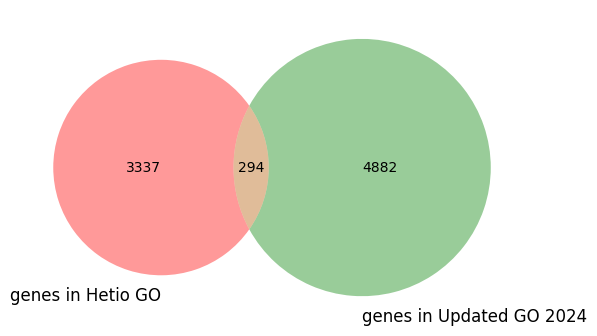

In [27]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define two sets

set1 = set(hetio_filt['target_id'])
set2 = set(upd_go_filt['gene_id'])

# Create Venn diagram
venn2([set1, set2], set_labels=('genes in Hetio GO', 'genes in Updated GO 2024'))

# Show the plot
#plt.title("Venn Diagram of Two Sets")
plt.show()


### Number of genes in Hetio GO [GO have up to 250 Genes and up to 25% Genes are added]

In [28]:
# Count of genes only in Hetionet (not in updated GO) for selected GO terms
n_hetio_only_genes = len(hetio_only_genes)
n_hetio_only_genes


3337

In [29]:
# Filter Hetionet rows to retain only genes unique to Hetionet for selected GO terms
hetio_only_df = hetio_filt[(hetio_filt['target_id'].isin(hetio_only_genes)) & (hetio_filt['source_identifier'].isin(merged_filt['go_id']))].reset_index(drop=True)
hetio_only_df


,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131217,GO:0001956,4602,BPpGbCuG,1,0.007132,0.000152,7.758083,12,3,14012800,774470,4.130925,1.079296,34112,27295,12233145
1,3131319,GO:0002407,3385,BPpGbCuG,1,0.006224,0.000132,8.097550,16,8,1728000,284289,3.726058,1.083581,5759,44359,12233414
2,3131462,GO:0006084,23142,BPpGbCuG,1,0.009107,0.000194,7.838121,25,5,2520000,419780,3.658546,1.080579,22264,18935,12234005
3,3132087,GO:0006636,3251,BPpGbCuG,1,0.008053,0.000171,7.749187,56,1,5969600,500293,3.920684,1.081670,2033,9340,12236047
4,3132088,GO:0006636,80349,BPpGbCuG,1,0.008053,0.000171,7.749187,56,1,5969600,500293,3.920684,1.081670,2033,17562,12236047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7878,163776452,GO:0070168,26511,BPpGbCdG,1,0.004258,0.000091,8.280819,19,8,1339000,248684,3.699015,1.072744,1408,17026,12117264
7879,163777548,GO:1900048,3875,BPpGbCdG,1,0.012430,0.000264,7.801564,24,8,1222000,281569,3.624240,1.076801,37006,38561,12117674
7880,163777549,GO:1900048,6923,BPpGbCdG,1,0.008194,0.000174,7.945405,24,6,2124400,391029,3.684517,1.076196,37006,22199,12117672
7881,163778393,GO:2001057,967,BPpGbCdG,1,0.010536,0.000224,7.550245,36,1,9052800,492077,4.141381,1.079540,16619,14084,12118651


### Fetch rows based on added genes from updated GO 2024 where GO terms added up to 25% Genes

In [30]:
# Filter Hetionet metapaths for genes only found in updated GO
upd_2024_only_df = hetio_mp3_pc1_df[hetio_mp3_pc1_df['target_id'].isin(upd_only_genes)].reset_index(drop=True)
upd_2024_only_df

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131044,GO:0000027,9969,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,960,12233803
1,3131112,GO:0001831,4247,BPpGbCuG,1,0.010514,0.000224,7.238124,3,1,247049600,1221717,5.265782,1.087984,39370,9150,12232549
2,3131116,GO:0001831,6729,BPpGbCuG,1,0.010514,0.000224,7.238124,3,1,247049600,1221717,5.265782,1.087984,39370,5030,12232549
3,3131304,GO:0002266,6509,BPpGbCuG,1,0.009824,0.000209,7.821597,2,38,3240000,231838,4.474236,1.026552,17235,2539,12232520
4,3131308,GO:0002268,6509,BPpGbCuG,1,0.009824,0.000209,7.821597,2,38,3240000,231838,4.474236,1.026552,6059,2539,12232520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,163777758,GO:1901300,8454,BPpGbCdG,1,0.013279,0.000283,7.037283,2,1,305532000,969346,5.529486,1.083019,20263,8522,12115863
13211,163777761,GO:1901300,9557,BPpGbCdG,1,0.013279,0.000283,7.037283,2,1,305532000,969346,5.529486,1.083019,20263,11027,12115863
13212,163778175,GO:1904823,5300,BPpGbCdG,1,0.008468,0.000180,8.010870,3,49,430400,52007,4.353304,1.020326,29953,22878,12115993
13213,163777618,GO:1900122,9517,BPpGbCdG,1,0.003988,0.000085,7.904583,6,1,98449200,947031,4.990568,1.078752,10450,1378,12116191


In [31]:
# Filter hetio_mp3_pc1_df to keep only rows where the GO term is also present in upd_2024_only_df
filtered_hetio_mp3_pc1_df = hetio_mp3_pc1_df[
    hetio_mp3_pc1_df['source_identifier'].isin(upd_2024_only_df['source_identifier'])
].reset_index(drop=True)
filtered_hetio_mp3_pc1_df

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131039,GO:0000027,662,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,45843,12233803
1,3131040,GO:0000027,6617,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,4594,12233803
2,3131041,GO:0000027,6873,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,18995,12233803
3,3131042,GO:0000027,7507,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,27327,12233803
4,3131043,GO:0000027,9662,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,3188,12233803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281888,163777788,GO:1901374,9124,BPpGbCdG,1,0.008678,0.000185,7.478739,3,2,102865600,972664,5.018681,1.075039,11384,35343,12115946
281889,163777913,GO:1901642,55608,BPpGbCdG,1,0.000933,0.000020,8.757832,11,3,11023600,543398,4.240327,1.068562,12377,45497,12116603
281890,163778197,GO:1904823,29978,BPpGbCdG,1,0.003393,0.000072,8.290678,3,28,2152000,180633,4.334106,1.029663,29953,36763,12115972
281891,163778232,GO:2000048,5216,BPpGbCdG,1,0.006278,0.000134,8.053516,4,29,962400,108994,4.214489,1.031863,576,42302,12116055


## Find pseudo GO for the updated Genes in New GO Terms 2024
### GO have upto 250 Genes
### New genes added upto 25%

In [33]:
import pandas as pd
from tqdm import tqdm
import numpy as np



# Unique GO terms
go_ids_hetio_upto_250g_ag_25p = hetio_filt['source_identifier'].unique() # GO upto 250 Genes and 25% added new genes


results = []

# Loop through each GO1 term from original Hetio
for go1 in tqdm(go_ids_hetio_upto_250g_ag_25p, desc="Selecting pseudo GO2 match per GO1 with no Hetio gene overlap"):

    # Gene sets
    updated_genes = set(upd_go_filt[upd_go_filt['go_id'] == go1]['gene_id'])
    hetio_genes = set(hetio_filt[hetio_filt['source_identifier'] == go1]['target_id'])
    new_genes = updated_genes - hetio_genes

    if not new_genes:
        continue  # skip if no new genes

    # Fetch GOs from hetio Precalculated stat for new genes
    gos_for_new_gene = hetio_mp3_pc1_df[hetio_mp3_pc1_df['target_id'].isin(new_genes)]['source_identifier'].unique()

    for go2 in gos_for_new_gene:
        go2_genes = set(hetio_mp3_pc1_df[hetio_mp3_pc1_df['source_identifier'] == go2]['target_id'])
        
        #Select GO where hetio old gene does not matched
        
        intersection_hetio_g_go2_g=len(hetio_genes & go2_genes)

        # Skip GO2 if any overlap with original Hetio genes for GO1
        if hetio_genes & go2_genes:
            continue

        # If we reach here, go2 has no overlap with old genes → save and continue
        new_gene_overlap = new_genes & go2_genes
        if new_gene_overlap:
            results.append({
                'go_id_hetio': go1,
                'pseudo_go_id': go2,
                'n_total_new_genes': len(new_genes),
                'intersection_hetio_g_go2_g':intersection_hetio_g_go2_g,
                'n_new_genes_in_match_w_pseudo_go': len(new_gene_overlap),
                'new_genes_in_match': list(new_gene_overlap)
            })
            continue  # 

# Final results
pseudo_go_result = pd.DataFrame(results)
pseudo_go_result = pseudo_go_result.sort_values(by='n_new_genes_in_match_w_pseudo_go', ascending=False).reset_index(drop=True)


display(pseudo_go_result.head(2))


Selecting pseudo GO2 match per GO1 with no Hetio gene overlap: 100%|████████████████████████████████████████████████████████████████| 341/341 [15:13<00:00,  2.68s/it]


,go_id_hetio,pseudo_go_id,n_total_new_genes,intersection_hetio_g_go2_g,n_new_genes_in_match_w_pseudo_go,new_genes_in_match
0,GO:0006312,GO:0009405,20,0,4,"[11144, 2067, 7517, 5893]"
1,GO:0006356,GO:1901421,48,0,4,"[10498, 9555, 9188, 9191]"


In [34]:
len(pseudo_go_result['go_id_hetio'].unique())

339

In [35]:
updated_GO_2024_only_new_gene=hetio_mp3_pc1_df[hetio_mp3_pc1_df['source_identifier'].isin(pseudo_go_result['pseudo_go_id']) \
                & hetio_mp3_pc1_df['target_id'].isin(upd_only_genes)].reset_index(drop=True)

In [36]:
updated_GO_2024_only_new_gene.head(2)

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131044,GO:0000027,9969,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,960,12233803
1,3131112,GO:0001831,4247,BPpGbCuG,1,0.010514,0.000224,7.238124,3,1,247049600,1221717,5.265782,1.087984,39370,9150,12232549


In [74]:
updated_GO_2024_only_new_gene

,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id
0,3131044,GO:0000027,9969,BPpGbCuG,1,0.014929,0.000318,7.269739,22,1,22041600,755044,4.318069,1.082651,22556,960,12233803
1,3131112,GO:0001831,4247,BPpGbCuG,1,0.010514,0.000224,7.238124,3,1,247049600,1221717,5.265782,1.087984,39370,9150,12232549
2,3131116,GO:0001831,6729,BPpGbCuG,1,0.010514,0.000224,7.238124,3,1,247049600,1221717,5.265782,1.087984,39370,5030,12232549
3,3131304,GO:0002266,6509,BPpGbCuG,1,0.009824,0.000209,7.821597,2,38,3240000,231838,4.474236,1.026552,17235,2539,12232520
4,3131308,GO:0002268,6509,BPpGbCuG,1,0.009824,0.000209,7.821597,2,38,3240000,231838,4.474236,1.026552,6059,2539,12232520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13104,163777758,GO:1901300,8454,BPpGbCdG,1,0.013279,0.000283,7.037283,2,1,305532000,969346,5.529486,1.083019,20263,8522,12115863
13105,163777761,GO:1901300,9557,BPpGbCdG,1,0.013279,0.000283,7.037283,2,1,305532000,969346,5.529486,1.083019,20263,11027,12115863
13106,163778175,GO:1904823,5300,BPpGbCdG,1,0.008468,0.000180,8.010870,3,49,430400,52007,4.353304,1.020326,29953,22878,12115993
13107,163777618,GO:1900122,9517,BPpGbCdG,1,0.003988,0.000085,7.904583,6,1,98449200,947031,4.990568,1.078752,10450,1378,12116191


In [37]:
# Group by source_identifier and aggregate statistics
updated_GO_2024_only_new_gene_stats = (
    updated_GO_2024_only_new_gene.groupby('source_identifier')
    .agg(
        mean_dwpc=('dwpc', 'mean'),
        mean_p_value=('p_value', 'mean'),
        mean_adjusted_p_value=('adjusted_p_value', 'mean'),
        mean_nonzero_mean=('nonzero_mean', 'mean'),
        mean_nonzero_sd=('nonzero_sd', 'mean'))
    
    .reset_index()
    )

# Display the first few grouped GO terms
display(updated_GO_2024_only_new_gene_stats.head(2))

,source_identifier,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000002,5.299317,0.000172,0.00810,2.398505,0.886370
1,GO:0000019,6.117576,0.000270,0.01267,1.249711,1.117082


In [38]:
updated_GO_2024_only_new_gene_stats

,source_identifier,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000002,5.299317,0.000172,0.008100,2.398505,0.886370
1,GO:0000019,6.117576,0.000270,0.012670,1.249711,1.117082
2,GO:0000023,5.962629,0.000229,0.010762,2.126948,0.946304
3,GO:0000027,6.574121,0.000307,0.014428,3.234031,0.957731
4,GO:0000028,6.466149,0.000324,0.015240,2.890830,1.134723
...,...,...,...,...,...,...
4994,GO:2001288,5.497641,0.000208,0.009775,3.930471,0.578217
4995,GO:2001293,6.520122,0.000102,0.004789,2.613154,1.158218
4996,GO:2001301,6.266938,0.000209,0.009827,2.237638,1.119258
4997,GO:2001302,6.266938,0.000209,0.009827,2.237638,1.119258


In [39]:
pseudo_go_result_dup=pseudo_go_result.copy()

In [40]:
pseudo_go_result_dup=pseudo_go_result_dup.rename(columns={'pseudo_go_id':'source_identifier'})

In [41]:
mege_pseudo_go_result_dup=pd.merge(pseudo_go_result_dup[['go_id_hetio','source_identifier']],updated_GO_2024_only_new_gene_stats,on=['source_identifier'],how='inner')

In [42]:
mege_pseudo_go_result_dup

,go_id_hetio,source_identifier,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0006312,GO:0009405,2.051932,0.000154,0.007242,0.368198,0.263876
1,GO:0006356,GO:1901421,5.693112,0.000128,0.005997,3.195661,0.676258
2,GO:0010664,GO:0070894,5.399293,0.000261,0.012254,3.768144,0.580264
3,GO:0007271,GO:0015876,4.945224,0.000116,0.005437,1.288523,0.620706
4,GO:0007271,GO:1901337,4.945224,0.000116,0.005437,1.288523,0.620706
...,...,...,...,...,...,...,...
30512,GO:0006479,GO:0003186,6.254253,0.000125,0.005857,2.793988,1.168964
30513,GO:0006479,GO:0055057,6.502201,0.000200,0.009381,2.504329,1.226997
30514,GO:0006479,GO:0055059,6.621000,0.000138,0.006508,3.064267,1.175100
30515,GO:0006479,GO:0060318,7.165669,0.000147,0.006897,4.400899,1.121501


In [43]:
# Group by source_identifier and aggregate statistics
go_updated_GO_2024_summary_stats_w_hetio_go_key = (
    mege_pseudo_go_result_dup.groupby('go_id_hetio')
    .agg(
        mean_dwpc=('mean_dwpc', 'mean'),
        mean_p_value=('mean_p_value', 'mean'),
        mean_adjusted_p_value=('mean_adjusted_p_value', 'mean'),
        mean_nonzero_mean=('mean_nonzero_mean', 'mean'),
        mean_nonzero_sd=('mean_nonzero_sd', 'mean'))
    
    .reset_index()
    )

# Display the first few grouped GO terms
display(go_updated_GO_2024_summary_stats_w_hetio_go_key.head(2))


,go_id_hetio,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000212,5.610323,0.000176,0.008275,2.175992,0.838544
1,GO:0000288,6.009666,0.000167,0.007832,2.972572,0.851962


In [44]:
go_updated_GO_2024_summary_stats_w_hetio_go_key

,go_id_hetio,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000212,5.610323,0.000176,0.008275,2.175992,0.838544
1,GO:0000288,6.009666,0.000167,0.007832,2.972572,0.851962
2,GO:0001675,6.079881,0.000194,0.009122,2.850789,0.972449
3,GO:0001773,5.726052,0.000200,0.009402,2.351721,0.890449
4,GO:0001895,6.105608,0.000158,0.007445,2.572313,0.973603
...,...,...,...,...,...,...
334,GO:2000551,5.416262,0.000180,0.008458,2.131685,0.853039
335,GO:2000811,5.954717,0.000209,0.009800,2.493328,0.986092
336,GO:2001014,5.984261,0.000195,0.009185,3.214629,0.868185
337,GO:2001057,6.049082,0.000173,0.008137,2.970854,0.941099


In [45]:
# Group by source_identifier in hetio_only_df
go_summary_stats_hetio_only = (
    hetio_only_df.groupby('source_identifier')
    .agg(
        
        mean_dwpc=('dwpc', 'mean'),
        mean_p_value=('p_value', 'mean'),
        mean_adjusted_p_value=('adjusted_p_value', 'mean'),
        mean_nonzero_mean=('nonzero_mean', 'mean'),
        mean_nonzero_sd=('nonzero_sd', 'mean'))
    .reset_index()
)

# Display first few GO term summary stats
display(go_summary_stats_hetio_only.head(2))


,source_identifier,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000212,5.342365,0.000143,0.006706,2.248018,0.901382
1,GO:0000288,5.079223,0.000095,0.004465,1.758598,0.647277


In [47]:
# Add a 'go_size' column to updated GO to assist with bucketing
upd_go_sizes = (
    upd_go_filt.groupby('go_id')['gene_id']
    .nunique()
    .reset_index()
    .rename(columns={'gene_id': 'go_size'})
)
upd_go_sizes

,go_id,go_size
0,GO:0000212,22
1,GO:0000288,36
2,GO:0001675,35
3,GO:0001773,24
4,GO:0001895,57
...,...,...
336,GO:2000551,13
337,GO:2000811,19
338,GO:2001014,22
339,GO:2001057,33


## Find pseudo Updated GO for the Random Genes

In [48]:
import pandas as pd
import numpy as np
from tqdm import tqdm



rng = np.random.default_rng(seed=42)
sampled_rows_all = []

# Loop through each go_id and select N rows randomly from the full filtered set
for _, row in tqdm(upd_go_sizes.iterrows(), total=len(upd_go_sizes), desc="Sampling rows per GO ID"):
    go_id = row['go_id']
    sample_size = row['go_size']

    # If not enough rows, skip
    if sample_size == 0 or sample_size > len(filtered_hetio_mp3_pc1_df):
        continue

    sampled_rows = filtered_hetio_mp3_pc1_df.sample(
        n=sample_size,
        replace=False,
        random_state=rng.integers(1e6)
    ).copy()

    # Annotate with go_id and sample size
    sampled_rows['assigned_go_id'] = go_id
    sampled_rows['assigned_sample_size'] = sample_size

    sampled_rows_all.append(sampled_rows)

# Combine results
random_sampled_go = pd.concat(sampled_rows_all, ignore_index=True)

# Display
display(random_sampled_go.head(25))


Sampling rows per GO ID: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 341/341 [00:01<00:00, 329.07it/s]


,id,source_identifier,target_identifier,metapath_id,path_count,adjusted_p_value,p_value,dwpc,source_degree,target_degree,n_dwpcs,n_nonzero_dwpcs,nonzero_mean,nonzero_sd,source_id,target_id,dgp_id,assigned_go_id,assigned_sample_size
0,49927789,GO:0031444,138162,BPpGcGcG,1,0.001473,0.000031,7.045032,2,1,972324000,6601381,3.110857,1.183500,19000,22440,12501423,GO:0000212,22
1,56969978,GO:2000270,348793,BPpGiGiG,1,0.014250,0.000303,2.661348,8,1,190694400,113682088,0.430436,0.365484,20043,40767,15080775,GO:0000212,22
2,116859934,GO:0015074,2946,BPpGdDdG,1,0.012857,0.000274,5.192885,9,1,254780400,32717623,3.225182,0.596035,14678,33699,14486987,GO:0000212,22
3,123496427,GO:0002457,4501,BPpGdCdG,1,0.000846,0.000018,6.982645,4,4,26786800,4609349,2.956994,0.817982,2161,6111,14308605,GO:0000212,22
4,49929798,GO:0032902,9871,BPpGcGcG,1,0.008441,0.000180,5.780493,2,1,972324000,6601381,3.110857,1.183500,15846,31918,12501423,GO:0000212,22
5,116856211,GO:0006848,7289,BPpGdDdG,1,0.001655,0.000035,5.790865,4,1,695013200,41385204,3.595767,0.583174,27250,43495,14486952,GO:0000212,22
6,100930532,GO:0050855,3996,BPpGcGiG,1,0.011322,0.000241,6.818206,15,17,5696000,450317,2.710822,1.128491,25341,30203,12686245,GO:0000212,22
7,49939802,GO:0046707,92241,BPpGcGcG,1,0.009008,0.000192,5.934402,2,2,642492000,8594123,2.793988,1.168964,11943,7473,12501424,GO:0000212,22
8,123785610,GO:0071029,9881,BPpGdDaG,1,0.005575,0.000119,6.170892,6,2,108471600,7759208,3.708487,0.717617,12893,17803,14464481,GO:0000212,22
9,48437562,GO:0045793,1759,BPpGuCuG,1,0.014469,0.000308,6.588384,13,11,1980000,1497444,2.553335,0.885559,25496,29388,18502734,GO:0000212,22


In [49]:
# Group by source_identifier in hetio_only_df
random_sampled_go_group = (
    random_sampled_go.groupby('assigned_go_id')
    .agg(
        
        mean_dwpc=('dwpc', 'mean'),
        mean_p_value=('p_value', 'mean'),
        mean_adjusted_p_value=('adjusted_p_value', 'mean'),
        mean_nonzero_mean=('nonzero_mean', 'mean'),
        mean_nonzero_sd=('nonzero_sd', 'mean')
    )
    .reset_index()
)

# Display first few GO term summary stats
display(random_sampled_go_group.head(2))


,assigned_go_id,mean_dwpc,mean_p_value,mean_adjusted_p_value,mean_nonzero_mean,mean_nonzero_sd
0,GO:0000212,6.100028,0.000173,0.008130,2.754322,0.916447
1,GO:0000288,5.642701,0.000171,0.008022,2.610096,0.893938


In [242]:
updated_GO_2024_only_new_random_gene=hetio_mp3_pc1_df[hetio_mp3_pc1_df['source_identifier'].isin(pseudo_go_random_bucket_result['pseudo_go_id_matched'])].reset_index(drop=True)

## Compare the distribution of different Hetionet statistics (e.g, 'dwpc', 'nonzero_mean', 'nonzero_sd','p_value','adjusted_p_value') in between Hetio GO Terms 2015, New GO Terms 2024 and New GO Terms 2024 with Random genes

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import ticker, font_manager
from scipy.stats import gaussian_kde, ttest_ind

def plot_hist_with_three_box_strip(df1, df2, df3, column,
                                   labels=('Hetio GO 2015', 'Updated GO 2024', 'Random Bucket'),
                                   bins=30, decimals=3, jitter=0.2,
                                   save=False, save_path="plot"):
    data1 = df1[column].dropna()
    data2 = df2[column].dropna()
    data3 = df3[column].dropna()

    # Shared bin edges
    combined_min = min(data1.min(), data2.min(), data3.min())
    combined_max = max(data1.max(), data2.max(), data3.max())
    bin_edges = np.linspace(combined_min, combined_max, bins + 1)

    # Colors
    palette = sns.color_palette("colorblind", n_colors=6)
    color_map = {
        labels[0]: palette[0],
        labels[1]: palette[3],
        labels[2]: palette[2]
    }

    bold_font = font_manager.FontProperties(weight='bold')

    # Layout: 3 strip-box plots + 1 histogram
    fig, axes = plt.subplots(4, 1, figsize=(8, 8),
                             gridspec_kw={'height_ratios': [1, 1, 1, 4], 'hspace': 0.15})
    ax_box1, ax_box2, ax_box3, ax_hist = axes

    def box_and_strip(ax, data, label, color):
        sns.stripplot(x=data, ax=ax, color=color,
                      size=0.9, jitter=jitter, alpha=0.5, zorder=1)
        sns.boxplot(x=data, ax=ax, color=color,
                    linewidth=1.5, fliersize=0, notch=True, width=0.4,
                    zorder=2, boxprops=dict(facecolor=color, alpha=0.6))
        ax.set_title(label, fontweight='bold')
        ax.set_xticks([]); ax.set_yticks([]); ax.set_xlabel(''); ax.set_ylabel('')
        ax.tick_params(bottom=False, left=False); ax.grid(False)
        sns.despine(ax=ax, left=True, bottom=True)
        ax.spines['bottom'].set_color('black')

    # Draw box + strip plots
    box_and_strip(ax_box1, data1, labels[0], color_map[labels[0]])
    box_and_strip(ax_box2, data2, labels[1], color_map[labels[1]])
    box_and_strip(ax_box3, data3, labels[2], color_map[labels[2]])

    # Histograms and KDEs
    for data, label in zip([data1, data2, data3], labels):
        color = color_map[label]
        ax_hist.hist(data, bins=bin_edges, color=color, edgecolor='black',
                     alpha=0.4, label=f'{label} hist')
        kde = gaussian_kde(data)
        x_vals = np.linspace(combined_min, combined_max, 1000)
        kde_vals = kde(x_vals) * len(data) * (bin_edges[1] - bin_edges[0])
        ax_hist.plot(x_vals, kde_vals, color=color, linewidth=2, label=f'{label} KDE')

    # Stats: t-tests + Cohen's d
    def cohen_d(x, y):
        nx, ny = len(x), len(y)
        pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2))
        return (np.mean(x) - np.mean(y)) / pooled_std

    t12 = ttest_ind(data1, data2, equal_var=False).pvalue
    t13 = ttest_ind(data1, data3, equal_var=False).pvalue
    t23 = ttest_ind(data2, data3, equal_var=False).pvalue

    d12 = cohen_d(data1, data2)
    d13 = cohen_d(data1, data3)
    d23 = cohen_d(data2, data3)

    def format_p(p):
        return "P < 0.001 *" if p < 0.001 else f"P = {p:.1e}"

    # Annotate
    ax_hist.annotate(
        f"{format_p(t12)} (Hetio vs Updated) | d = {d12:.2f}\n"
        f"{format_p(t13)} (Hetio vs Random)  | d = {d13:.2f}\n"
        f"{format_p(t23)} (Updated vs Random)| d = {d23:.2f}",
        xy=(0.98, 1.10), xycoords='axes fraction',
        ha='right', va='top',
        fontsize=10, fontweight='bold', color='black',
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='black', linewidth=0.0)
    )

    # Formatting
    ax_hist.set_xlabel(column, fontsize=14, fontweight='bold', color='black')
    ax_hist.set_ylabel('Count', fontsize=14, fontweight='bold', color='black')
    ax_hist.tick_params(axis='both', labelsize=12)
    ax_hist.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.{decimals}f}"))
    for label in ax_hist.get_xticklabels() + ax_hist.get_yticklabels():
        label.set_fontproperties(bold_font)

    legend = ax_hist.legend(loc='upper right', fontsize=8, frameon=True)
    legend.get_frame().set_alpha(0.0)
    legend.get_frame().set_edgecolor('none')

    ax_hist.grid(False)
    sns.despine(ax=ax_hist)
    ax_hist.spines['bottom'].set_color('black')
    ax_hist.spines['left'].set_color('black')

    plt.subplots_adjust(top=0.96, bottom=0.06)

    if save:
        fig.savefig(f"{save_path}.jpeg", format='jpeg', dpi=600)
        fig.savefig(f"{save_path}.pdf", format='pdf', dpi=600)

    plt.show()


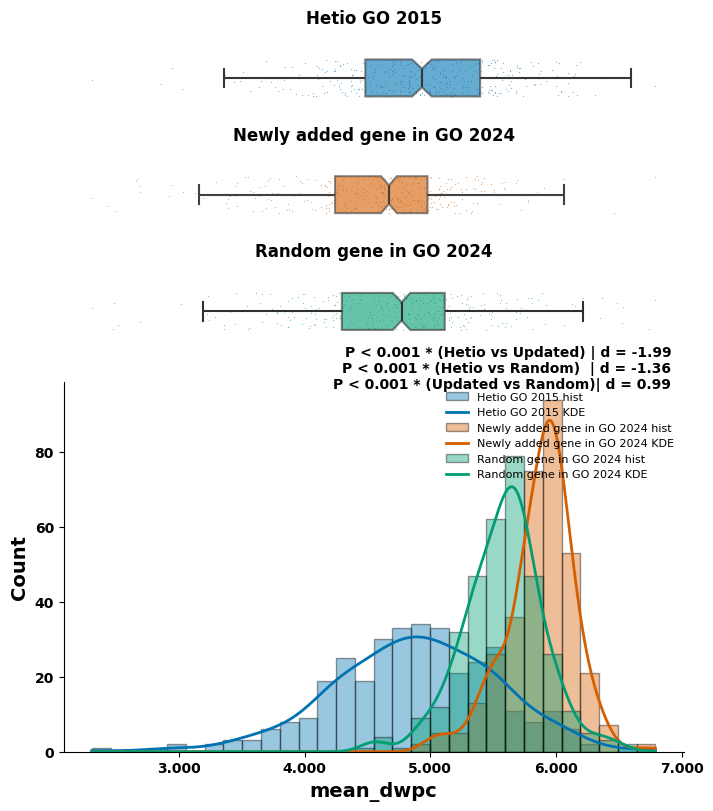

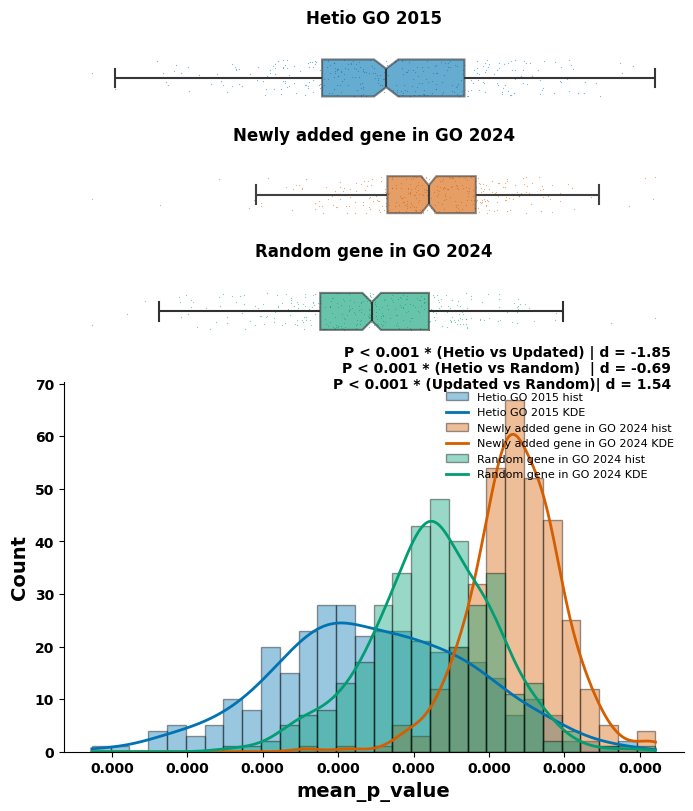

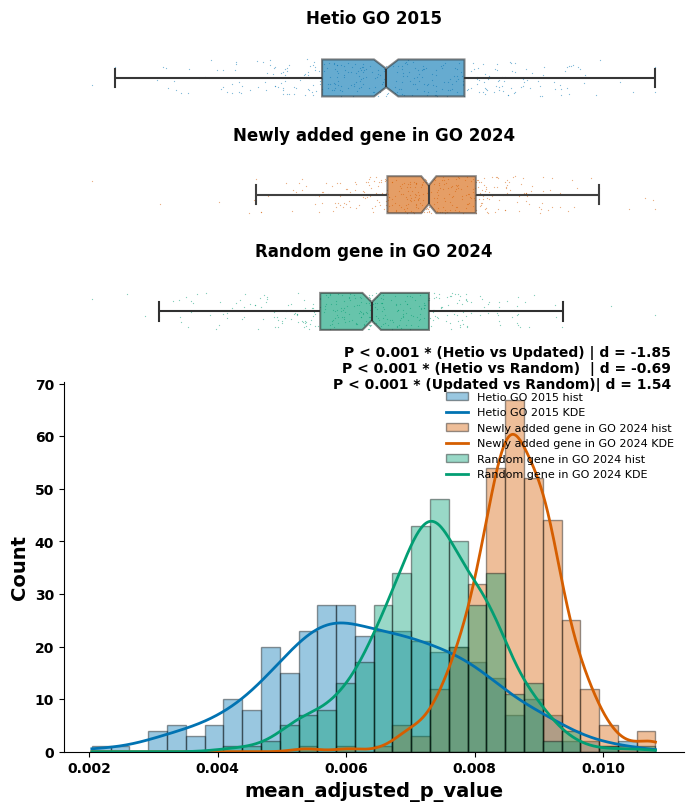

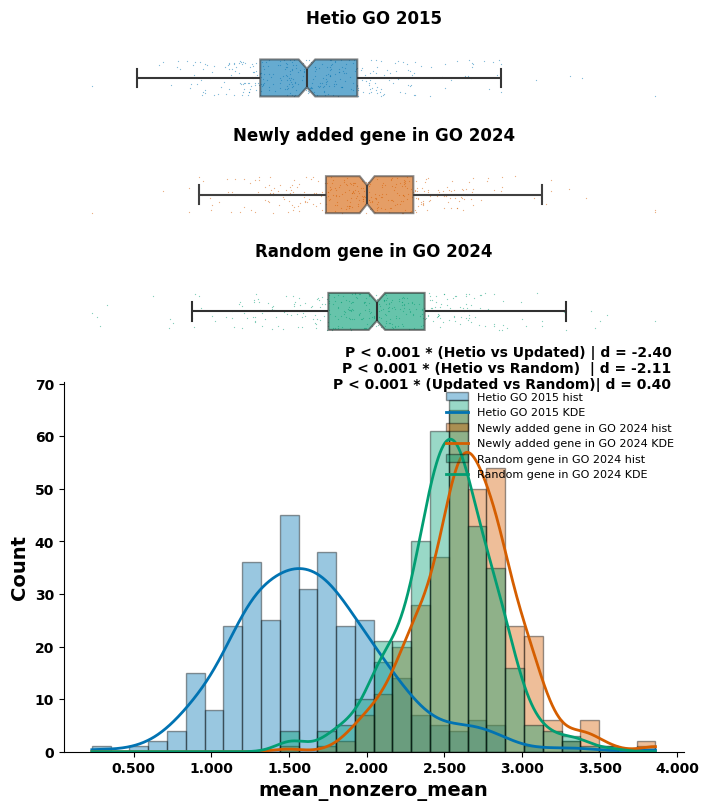

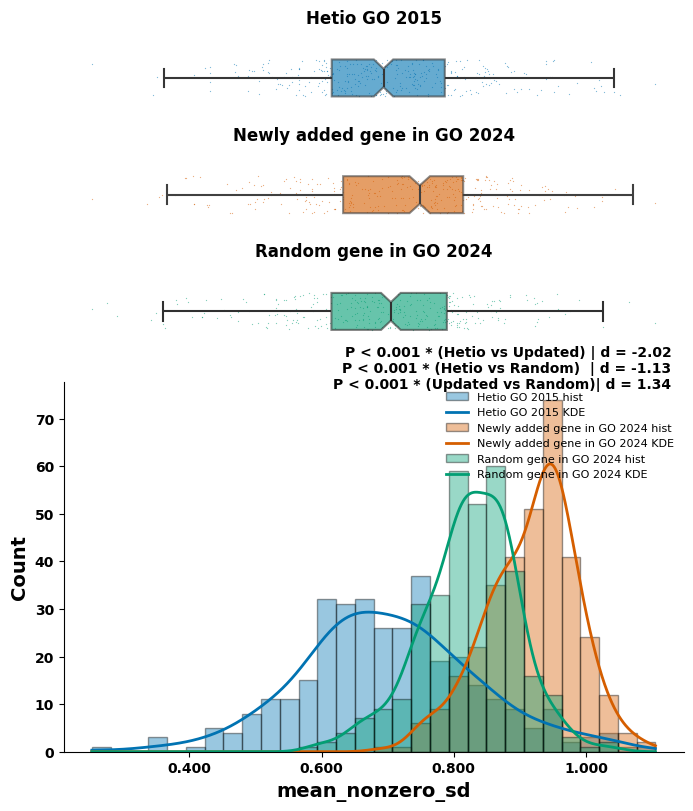

In [53]:
columns_to_plot = ['mean_dwpc','mean_p_value','mean_adjusted_p_value','mean_nonzero_mean','mean_nonzero_sd']  # Replace with your actual column names

for col in columns_to_plot:


    plot_hist_with_three_box_strip(
        df1=go_summary_stats_hetio_only,
        df2=go_updated_GO_2024_summary_stats_w_hetio_go_key, 
        df3=random_sampled_go_group,
        column=col,
        labels=('Hetio GO 2015', 'Newly added gene in GO 2024', 'Random gene in GO 2024'),
        save=True,
        save_path=f"./output/threeway_comparison_plot_{col}"
    )
